In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf 
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import random
import pickle
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
datadir = "D:/MachineLearning/LeafDisease/data/"
labels = os.listdir(datadir)
IMG_SIZE = 100

In [3]:
labels

['Bacteria', 'Fungi', 'Nematodes', 'Normal', 'Virus']

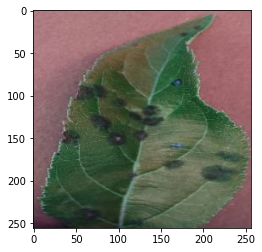

In [4]:
for label in labels:
    path = os.path.join(datadir,label)
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break 
    break 

In [5]:
training_data = []

def create_training_data():
    for label in labels:
        path = os.path.join(datadir,label)
        class_num = labels.index(label) 
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [6]:
create_training_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 735.28it/s]


In [7]:
training_data

[[array([[[174, 123, 130],
          [174, 123, 130],
          [176, 125, 131],
          ...,
          [173, 117, 122],
          [174, 118, 123],
          [172, 116, 121]],
  
         [[176, 125, 132],
          [176, 125, 132],
          [170, 119, 126],
          ...,
          [174, 118, 123],
          [174, 117, 122],
          [174, 118, 123]],
  
         [[173, 122, 129],
          [170, 119, 126],
          [176, 125, 132],
          ...,
          [176, 120, 125],
          [173, 117, 122],
          [175, 119, 124]],
  
         ...,
  
         [[ 69,  37,  54],
          [ 70,  37,  54],
          [ 72,  39,  55],
          ...,
          [116,  77,  85],
          [118,  79,  87],
          [123,  84,  92]],
  
         [[ 61,  34,  50],
          [ 61,  34,  50],
          [ 61,  34,  50],
          ...,
          [114,  77,  85],
          [115,  78,  86],
          [119,  82,  90]],
  
         [[ 53,  30,  45],
          [ 52,  29,  44],
          [ 51,  28,  43

In [8]:
print(len(training_data))

239


In [9]:
random.shuffle(training_data)

In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [11]:
X.shape

(239, 100, 100, 3)

In [12]:
y = np.array(y)

In [13]:
y.shape

(239,)

In [14]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same",input_shape=X.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
____

In [16]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [21]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=32),
                               validation_data=(X_test, y_test),epochs=50, verbose=1)

Epoch 1/50
6/6 [==============================] - 3s 513ms/step - loss: 4.1484 - acc: 0.1309 - val_loss: 2.0827 - val_acc: 0.0833
Epoch 2/50
6/6 [==============================] - 3s 477ms/step - loss: 2.0282 - acc: 0.2199 - val_loss: 1.9380 - val_acc: 0.0833
Epoch 3/50
6/6 [==============================] - 3s 462ms/step - loss: 1.9035 - acc: 0.2461 - val_loss: 1.7915 - val_acc: 0.0833
Epoch 4/50
6/6 [==============================] - 3s 471ms/step - loss: 1.7346 - acc: 0.2775 - val_loss: 1.5917 - val_acc: 0.1875
Epoch 5/50
6/6 [==============================] - 3s 443ms/step - loss: 1.6200 - acc: 0.3822 - val_loss: 1.3483 - val_acc: 0.4583
Epoch 6/50
6/6 [==============================] - 3s 442ms/step - loss: 1.4162 - acc: 0.4555 - val_loss: 1.2275 - val_acc: 0.6458
Epoch 7/50
6/6 [==============================] - 3s 453ms/step - loss: 1.2926 - acc: 0.5497 - val_loss: 1.0498 - val_acc: 0.7083
Epoch 8/50
6/6 [==============================] - 3s 484ms/step - loss: 1.2014 - acc: 0.60

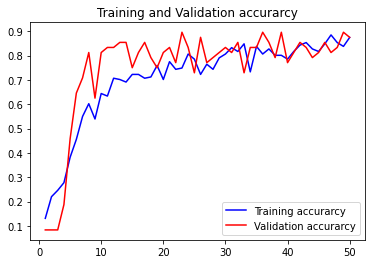

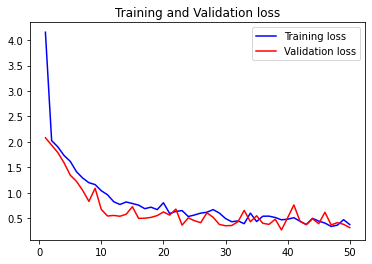

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [23]:
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

48/48 [==============================] - 0s 4ms/sample - loss: 0.3143 - acc: 0.8750
Test Accuracy: 87.5


In [24]:
model.save('leaf_disease.h5')

In [25]:
classifierLoad = tf.keras.models.load_model('leaf_disease.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
pic = cv2.imread('test3.jpg')
pic = cv2.resize(pic,(100,100))
pic = np.reshape(pic,[1,100,100,3])
y_prob = classifierLoad.predict(pic) 
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[4]
